# Analisando o bônus 2024

## Preparando os dados

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [ ]:
escolas = pd.read_excel('Bônus 2024 - Modificado.xlsx') 

escolas[0:5]

,COD. CIE,ESCOLA,DIRETORIA,MUNICIPIO,Total Alunos Particip.,% TPS,TPS Elegível,Meta IFA,% IFA,IFA Elegível,...,IDESP Ens.\nMédio,Part. Ens Fund. (A. Iniciais),Part. Ens. Fund. (A. Finais),Part. Ensino Médio,Total Part. 2023,IDESP 2023,Ouro,Diamante,IC,ICM
0,30806,Helen Keller,Adamantina,Adamantina,95,0.65,0,0.77,0.85,1,...,1.83,0,47,48,95,2.21,2.49,2.83,0.0,0.0
1,31045,Durvalino Grion Prof,Adamantina,Adamantina,74,0.87,1,0.80,0.85,1,...,NaN,0,74,0,74,3.20,4.73,4.98,0.0,0.0
2,31112,Fleurides Cavallini Menechino Profa,Adamantina,Adamantina,128,0.92,1,0.80,0.84,1,...,2.70,0,83,45,128,3.26,3.44,3.74,0.0,0.0
3,31252,Julieta Guedes Mendonca Profa,Adamantina,Adamantina,164,0.83,1,0.80,0.82,1,...,1.71,0,87,77,164,2.08,3.02,3.30,0.0,0.0
4,31264,9 De Julho,Adamantina,Adamantina,217,0.98,1,0.80,0.87,1,...,4.28,0,129,88,217,4.26,4.42,4.68,0.0,0.0


In [111]:
escolas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5014 entries, 0 to 5013
Data columns (total 22 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   COD. CIE                          5014 non-null   int64  
 1   ESCOLA                            5014 non-null   object 
 2   DIRETORIA                         5014 non-null   object 
 3   MUNICIPIO                         5014 non-null   object 
 4   Total     Alunos Particip.        5014 non-null   int64  
 5   % TPS                             5014 non-null   float64
 6   TPS Elegível                      5014 non-null   int64  
 7   Meta IFA                          5014 non-null   float64
 8   % IFA                             5014 non-null   float64
 9   IFA Elegível                      5014 non-null   int64  
 10  IDESP
Ens. Fund. (anos iniciais)  1345 non-null   float64
 11  IDESP  Ens.
Fund. (anos finais)   3663 non-null   float64
 12  IDESP 

## Analisando as escolas que receberam o Bônus 2024

In [277]:
escolas_diamante = escolas[escolas['IDESP 2023'] > escolas['Diamante']].sort_values(by='IDESP 2023', ascending=False)
escolas_bonus = escolas[escolas['IDESP 2023'] > escolas['Ouro']].sort_values(by='IDESP 2023')

escolas_diamante

,COD. CIE,ESCOLA,DIRETORIA,MUNICIPIO,Total Alunos Particip.,% TPS,TPS Elegível,Meta IFA,% IFA,IFA Elegível,...,IDESP Ens.\nMédio,Part. Ens Fund. (A. Iniciais),Part. Ens. Fund. (A. Finais),Part. Ensino Médio,Total Part. 2023,IDESP 2023,Ouro,Diamante,IC,ICM
2356,917151,Fernando Barbosa Prof,Mogi Mirim,Mogi Mirim,25,0.93,1,0.80,0.94,1,...,NaN,25,0,0,25,8.13,7.37,7.55,1.0,1.0
2261,32347,Joao Pinheiro Correa,Mirante Paranapanema,Mirante Paranapanema,18,1.00,1,0.80,0.99,1,...,NaN,18,0,0,18,7.96,7.01,7.17,1.0,1.0
52,37928,Sinesia Martini Profa,Americana,Americana,30,0.94,1,0.80,0.91,1,...,NaN,30,0,0,30,7.39,6.94,7.24,1.0,1.0
1434,15192,Fonseca Major,Itapetininga,Itapetininga,62,1.00,1,0.80,0.93,1,...,NaN,62,0,0,62,7.37,6.68,6.91,1.0,1.0
553,912852,Renato De Azevedo Rezende,Bragança Paulista,Bragança Paulista,24,0.96,1,0.80,0.92,1,...,NaN,24,0,0,24,7.36,5.17,5.44,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2500,910995,Olinda Leite Sinisgalli Profa,Norte 1,São Paulo,104,0.54,0,0.78,0.72,0,...,1.88,0,0,104,104,1.88,1.45,1.73,1.0,0.0
1236,352585,Bom Pastor Ii,Guarulhos Norte,Guarulhos Norte,186,0.66,0,0.76,0.73,0,...,1.73,0,60,126,186,1.80,1.25,1.50,1.0,0.0
2931,35105,Pascoal Grecco Prof,Registro,Registro,37,0.84,1,0.80,0.84,1,...,1.72,0,25,12,37,1.77,1.66,1.73,1.0,1.0
1502,49025,Jardim Maria Helena I,Itapevi,Itapevi,209,0.77,0,0.78,0.76,0,...,1.73,0,0,209,209,1.73,1.42,1.68,1.0,0.0


In [128]:
print(f"""
Número total de escolas: {len(escolas)}
Número de escolas que receberam o bônus: {len(escolas_bonus)} ({round(len(escolas_bonus)*100/len(escolas),2)}%)
Número de escolas que receberam o bônus diamante: {len(escolas_diamante)} ({round(len(escolas_diamante)*100/len(escolas),2)}%)

Número de escolas da cidade de São Paulo: {len(escolas[escolas['MUNICIPIO']== 'São Paulo'])}
Número de escolas da cidade de São Paulo que receberam o bônus: {len(escolas_bonus[escolas_bonus['MUNICIPIO']== 'São Paulo'])}
Porcentagem de escolas da cidade de São Paulo que receberam o bônus: {round(len(escolas_bonus[escolas_bonus['MUNICIPIO']== 'São Paulo'])*100/len(escolas[escolas['MUNICIPIO']== 'São Paulo']),2)}%
""")


Número total de escolas: 5014
Número de escolas que receberam o bônus: 1277 (25.47%)
Número de escolas que receberam o bônus diamante: 456 (9.09%)

Número de escolas da cidade de São Paulo: 1078
Número de escolas da cidade de São Paulo que receberam o bônus: 347
Porcentagem de escolas da cidade de São Paulo que receberam o bônus: 32.19%



## Análise de correlação

In [114]:
escolas_bonus['Total     Alunos Particip.'].describe()

count    1277.000000
mean      124.649961
std        83.385866
min         7.000000
25%        63.000000
50%       103.000000
75%       166.000000
max       584.000000
Name: Total     Alunos Particip., dtype: float64

In [115]:
df_cluster = escolas.drop(columns=['DIRETORIA', 'ESCOLA', 'MUNICIPIO'])
df_cluster[0:2]

,COD. CIE,Total Alunos Particip.,% TPS,TPS Elegível,Meta IFA,% IFA,IFA Elegível,IDESP\nEns. Fund. (anos iniciais),IDESP Ens.\nFund. (anos finais),IDESP Ens.\nMédio,Part. Ens Fund. (A. Iniciais),Part. Ens. Fund. (A. Finais),Part. Ensino Médio,Total Part. 2023,IDESP 2023,Ouro,Diamante,IC,ICM
0,30806,95,0.65,0,0.77,0.85,1,NaN,2.6,1.83,0,47,48,95,2.21,2.49,2.83,0.0,0.0
1,31045,74,0.87,1,0.80,0.85,1,NaN,3.2,NaN,0,74,0,74,3.20,4.73,4.98,0.0,0.0


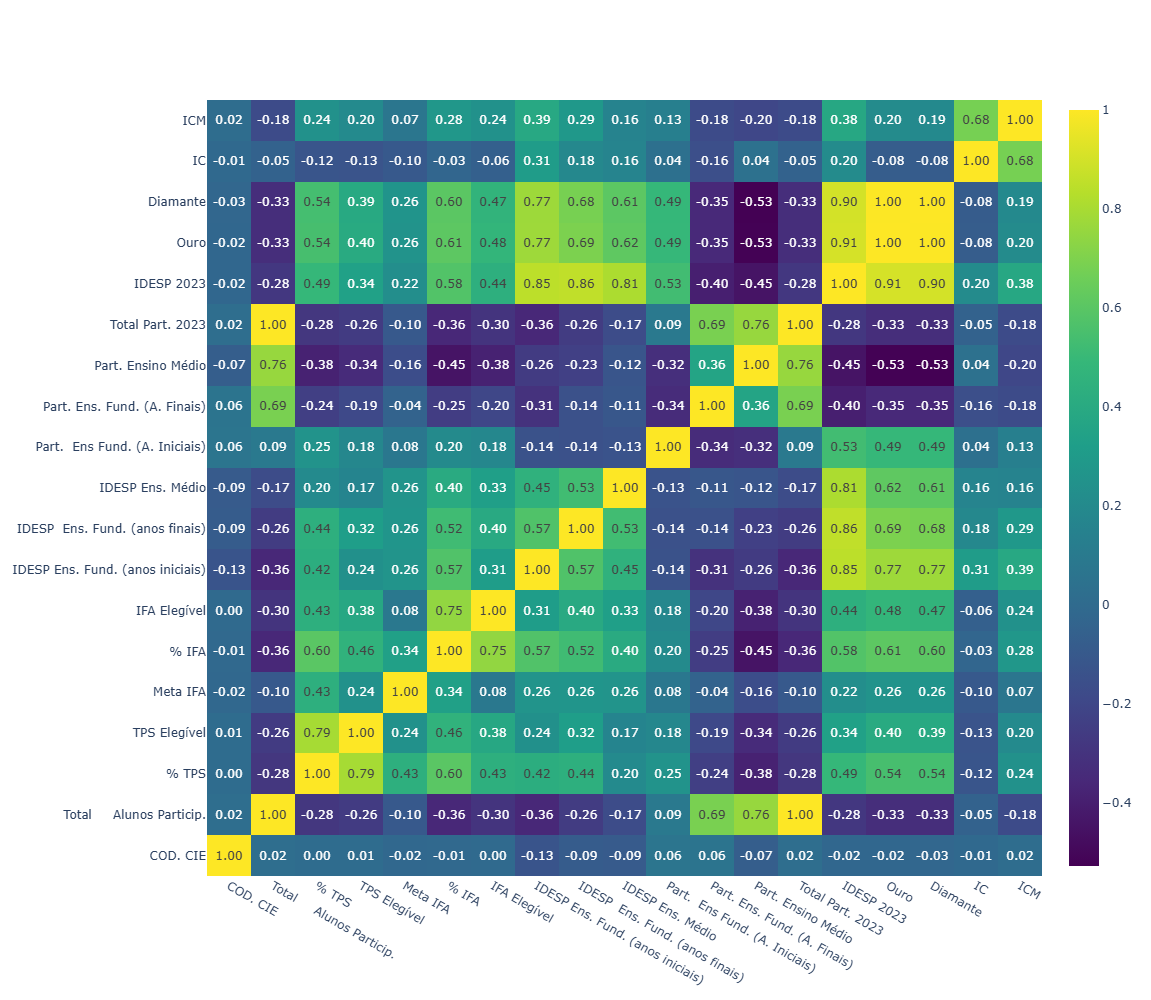

In [116]:
import plotly.graph_objects as go

# Matriz de correlações básica
corr = df_cluster.corr()

# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(
    height = 1000,
    width = 1000)

fig.show()

## Análise de Cluster

In [131]:
escolas.columns

Index(['COD. CIE', 'ESCOLA', 'DIRETORIA', 'MUNICIPIO',
       'Total     Alunos Particip.', '% TPS', 'TPS Elegível', 'Meta IFA',
       '% IFA', 'IFA Elegível', 'IDESP\nEns. Fund. (anos iniciais)',
       'IDESP  Ens.\nFund. (anos finais)', 'IDESP Ens.\nMédio',
       'Part.  Ens Fund. (A. Iniciais)', 'Part. Ens. Fund. (A. Finais)',
       'Part. Ensino Médio', 'Total Part. 2023', 'IDESP 2023', 'Ouro',
       'Diamante', 'IC', 'ICM'],
      dtype='object')

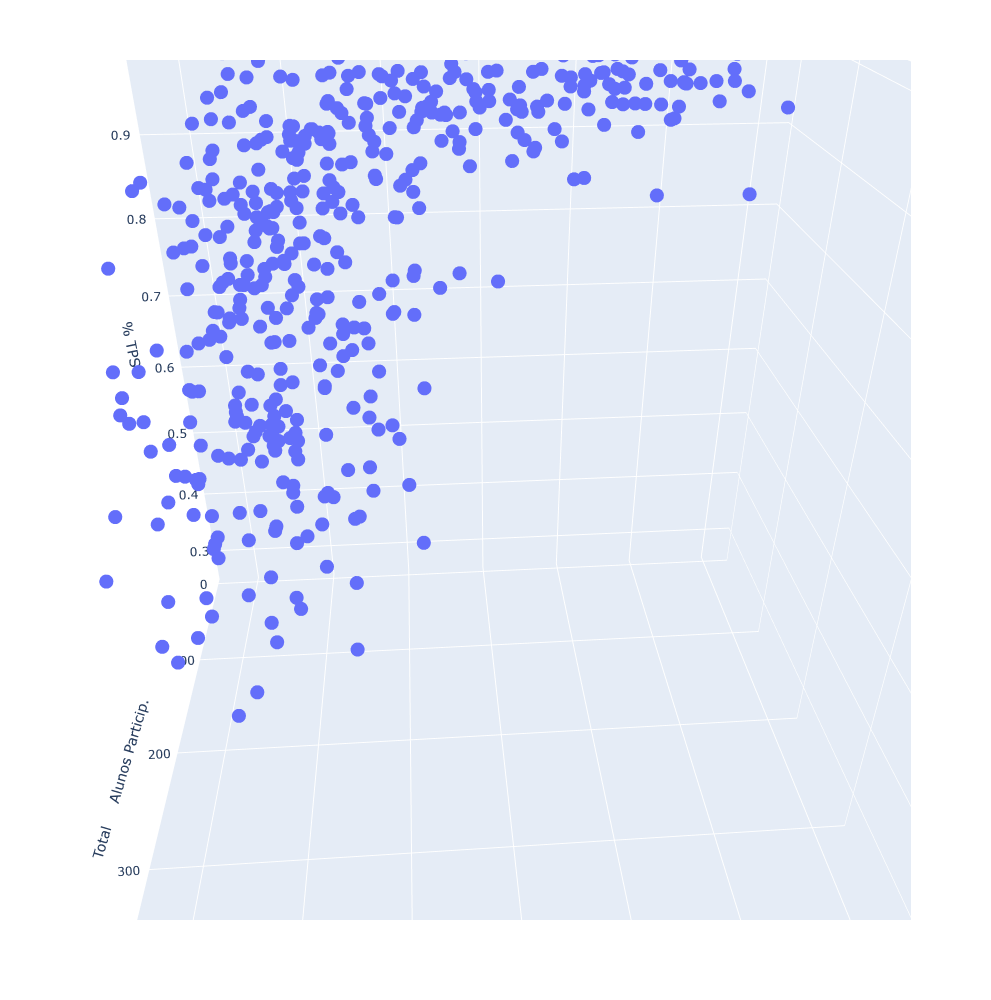

In [137]:
fig = px.scatter_3d(escolas_diamante,
                   x= 'Total     Alunos Particip.',
                   y= 'IDESP 2023',
                   z= '% TPS')

fig.update_layout(
    width = 1000,
    height = 1000
)

iplot(fig)

# Análise das notas do 2º Bimestre - 2º Ano A 

## Preparando os dados

In [235]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px 
import plotly.graph_objects as go
import plotly.io as pio

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

In [253]:
notas = pd.read_excel('Mapão 2A.xlsx')
notas.drop(columns=[notas.columns[1],notas.columns[2]],inplace=True)
notas = notas[notas['Sit']=='At']
notas['Nome'] = [nome.split()[0] for nome in notas['Nome']]

In [254]:
notas['Nome']

1         ALINE
4        ARTHUR
6        CARLOS
8          DAVI
9         DENIS
10       EMILLY
11        EMILY
12      EVERTON
14     GIOVANNA
15       GISELE
16    GUILHERME
17      GUSTAVO
22         JOAO
24      LARISSA
26        LUCAS
27        MARIA
33        PABLO
36         RUAN
37       SOPHIA
40        VITOR
41     ISABELLE
43        SARAH
47         CAIO
49    JHONATHAN
50        JULIA
51       KELVIN
52      MATHEUS
53      MONIQUE
54     PRICILLA
55      RAPHAEL
56     THAINARA
57       THALYA
59       DANILO
60        BRUNO
63        LYVIA
64          ANA
Name: Nome, dtype: object

In [255]:
notas_cluster = notas.drop(columns=['Nome','Sit','ESPORTE-MÚSICA-ARTE'])

for column in notas_cluster.columns:
    notas_cluster[column] = pd.to_numeric(notas_cluster[column], errors='coerce')
    notas[column] = pd.to_numeric(notas[column], errors='coerce')

notas_cluster = notas_cluster.dropna(axis=0, how='any')
notas = notas.dropna(axis=0, how='any')


## Análise de Correlação de Perason

In [256]:

# Matriz de correlações básica
corr = notas_cluster.corr()

# Gráfico de calor (heatmap)
fig = go.Figure()

fig.add_trace(
    go.Heatmap(
        x = corr.columns,
        y = corr.index,
        z = np.array(corr),
        text=corr.values,
        texttemplate='%{text:.2f}',
        colorscale='viridis'))

fig.update_layout(
    height = 800,
    width = 1000)

fig.show()

## Clusterização

In [257]:

fig = px.scatter_3d(notas_cluster, 
                    x='MATEMATICA', 
                    y='FISICA', 
                    z='LINGUA PORTUGUESA',
                    text=notas.Nome)
fig.update_layout(
    width = 800,
    height = 600
)
iplot(fig)


In [258]:

fig = px.scatter_3d(notas_cluster, 
                    x='MATEMATICA', 
                    y='EDUCACAO FISICA', 
                    z='LINGUA PORTUGUESA',
                    text=notas.Nome)
fig.update_layout(
    width = 800,
    height = 600
)
iplot(fig)


### Cluster - Distância euclidiana - single linkage

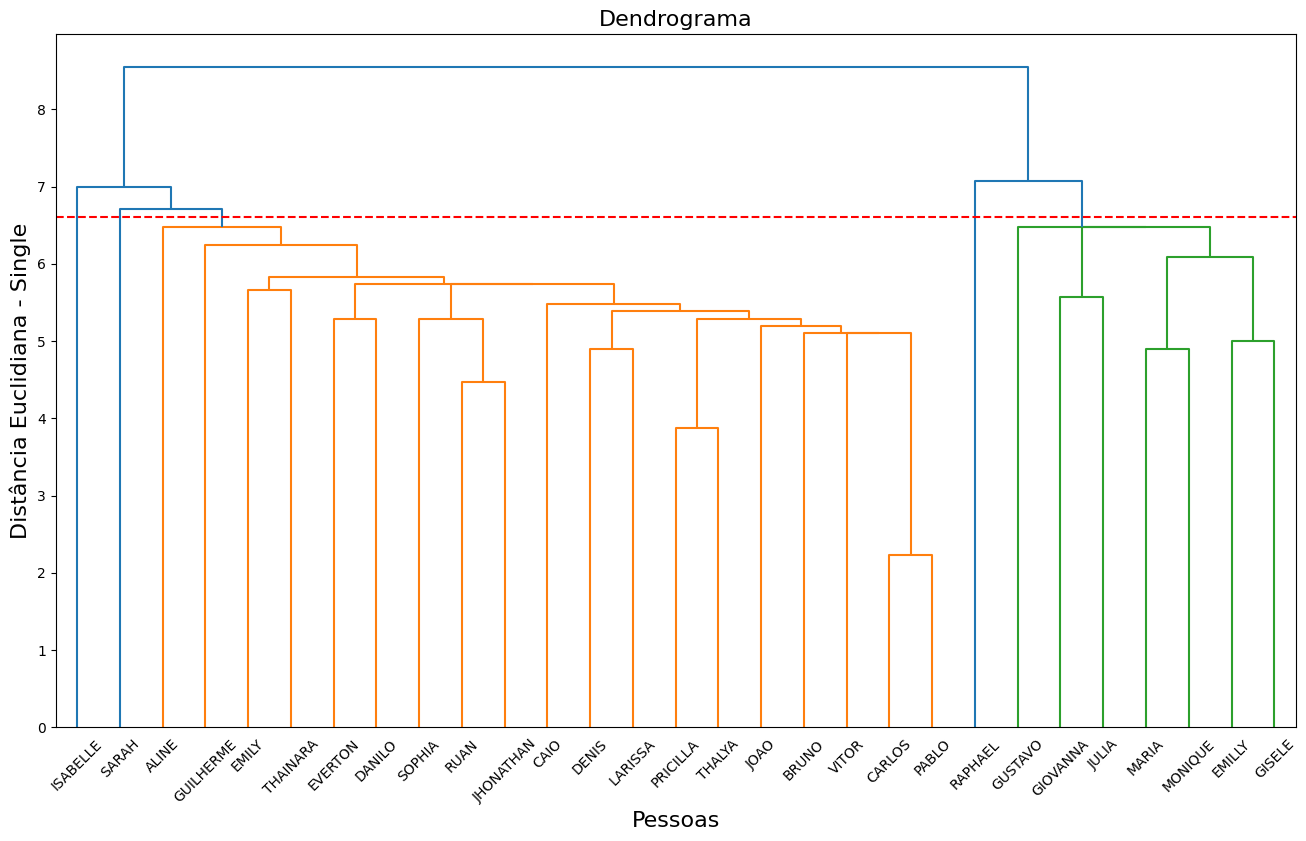

In [259]:
plt.figure(figsize=(16,9))
dend_sing = sch.linkage(notas_cluster, method = 'single', metric = 'euclidean')

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average
treshold = 6.6
dendrogram_s = sch.dendrogram(dend_sing, color_threshold = treshold, labels = list(notas.Nome))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana - Single', fontsize=16)
# a altura vermelha representa uma altura que se pode encerrar o esquema de aglomeração
plt.axhline(y = treshold, color = 'red', linestyle = '--')

plt.show()

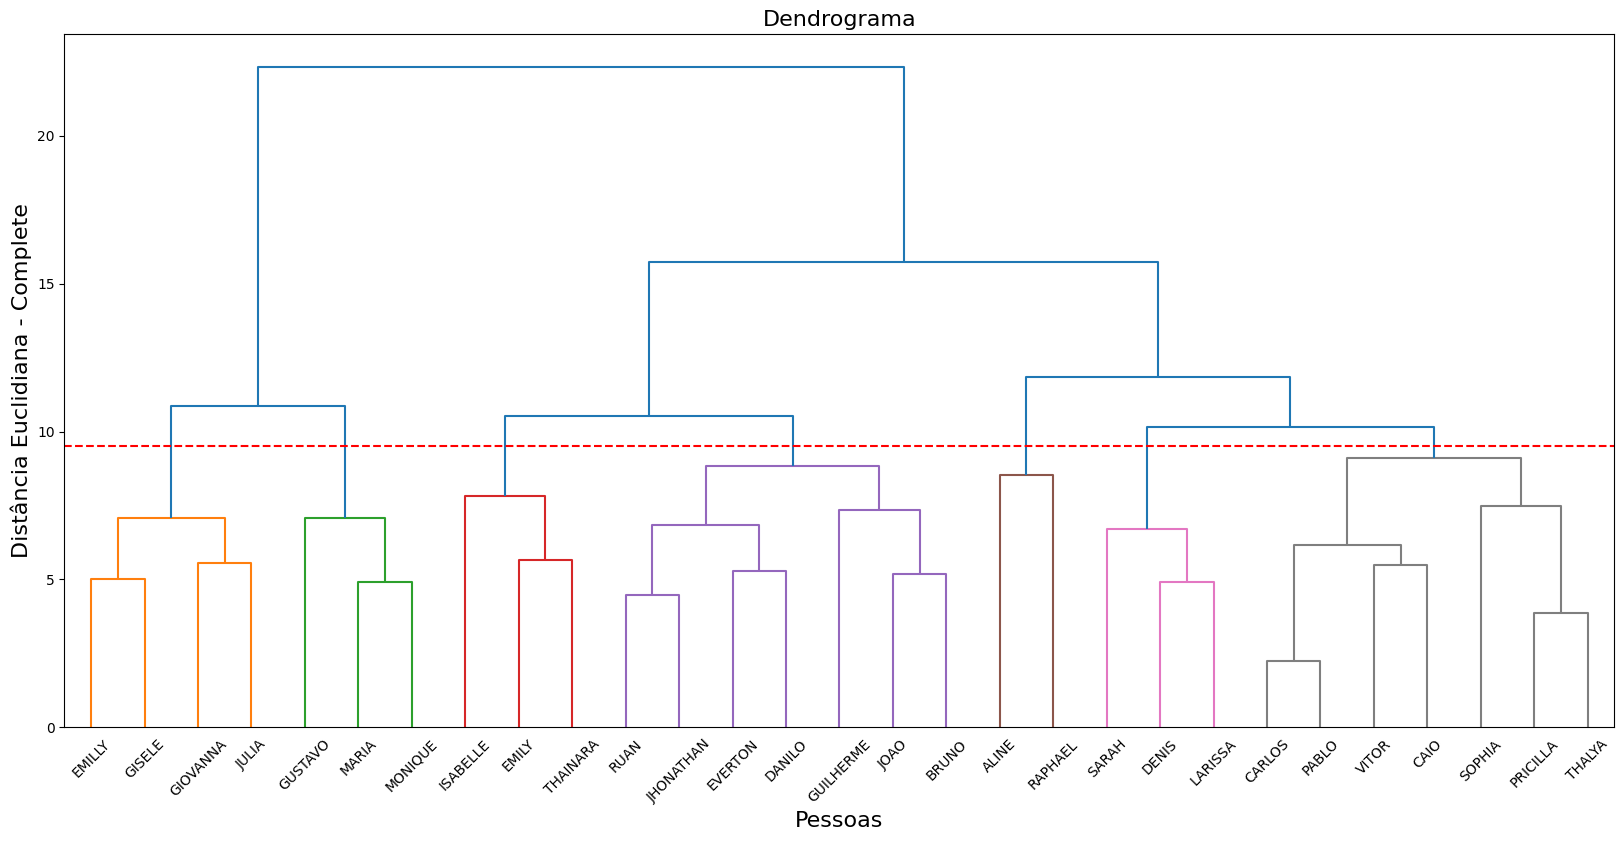

In [260]:
plt.figure(figsize=(20,9))
dend_comp = sch.linkage(notas_cluster, method = 'complete', metric = 'euclidean')

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average
treshold = 9.5
dendrogram_s = sch.dendrogram(dend_comp, color_threshold = treshold, labels = list(notas.Nome))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana - Complete', fontsize=16)
# a altura vermelha representa uma altura que se pode encerrar o esquema de aglomeração
plt.axhline(y = treshold, color = 'red', linestyle = '--')

plt.show()

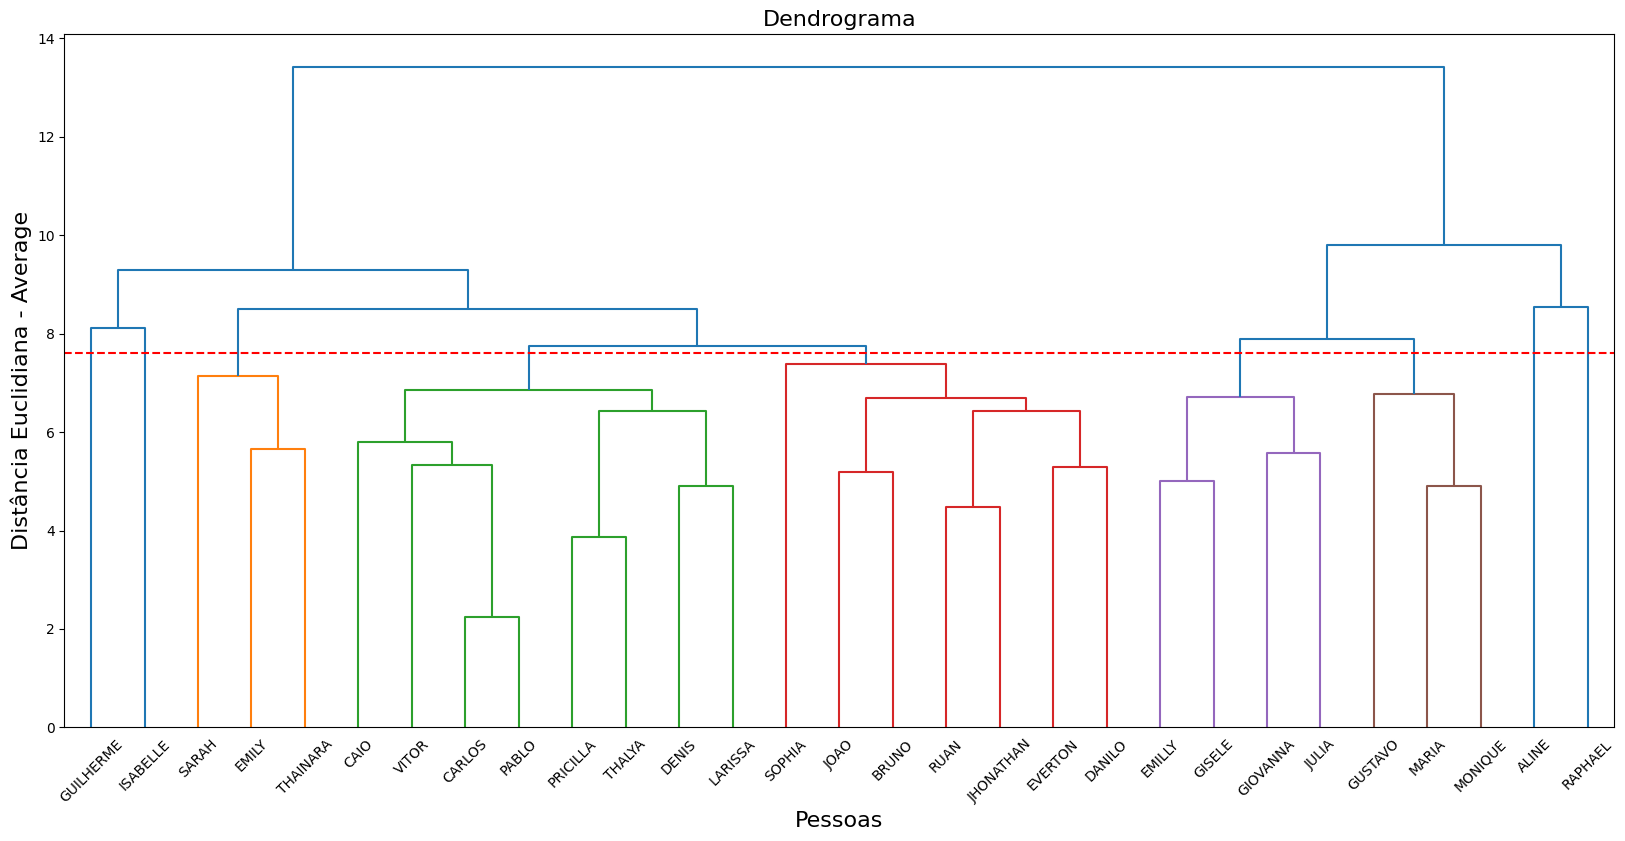

In [279]:
plt.figure(figsize=(20,9))
dend_av = sch.linkage(notas_cluster, method = 'average', metric = 'euclidean')

# Opções para o método de encadeamento ("method"):
    ## single
    ## complete
    ## average
treshold = 7.6
dendrogram_s = sch.dendrogram(dend_av, color_threshold = treshold, labels = list(notas.Nome))
plt.title('Dendrograma', fontsize=16)
plt.xlabel('Pessoas', fontsize=16)
plt.ylabel('Distância Euclidiana - Average', fontsize=16)
# a altura vermelha representa uma altura que se pode encerrar o esquema de aglomeração
plt.axhline(y = treshold, color = 'red', linestyle = '--')

plt.show()

### Gerando a variável de indicação de cluster

In [271]:
cluster_complete = AgglomerativeClustering(n_clusters=7, metric='euclidean', linkage='complete')
indica_cluster_complete = cluster_complete.fit_predict(notas_cluster)
notas['Cluster Complete'] = indica_cluster_complete
notas['Cluster Complete'] = notas['Cluster Complete'].astype('category')
notas

,Nome,Sit,LINGUA PORTUGUESA,EDUCACAO FISICA,GEOGRAFIA,HISTORIA,SOCIOLOGIA,BIOLOGIA,FISICA,MATEMATICA,QUIMICA,ORIENTACAO DE ESTUDOS,PROJETO DE VIDA,EDUCAÇÃO FINANCEIRA,REDAÇÃO E LEITURA,ESPORTE-MÚSICA-ARTE,INGLÊS,PRATICAS EXPERIMENTAIS,Cluster Complete
1,ALINE,At,6.0,9.0,2.0,4.0,8.0,7.0,7.0,5.0,9.0,8.0,9.0,9.0,9.0,ES,5.0,6.0,3
6,CARLOS,At,6.0,10.0,2.0,4.0,5.0,5.0,5.0,8.0,4.0,7.0,8.0,5.0,7.0,ES,5.0,5.0,0
9,DENIS,At,5.0,8.0,3.0,5.0,5.0,6.0,6.0,5.0,7.0,7.0,5.0,3.0,5.0,ES,5.0,5.0,6
10,EMILLY,At,8.0,9.0,8.0,7.0,8.0,9.0,9.0,7.0,4.0,8.0,8.0,6.0,10.0,ES,5.0,8.0,4
11,EMILY,At,6.0,8.0,7.0,4.0,4.0,5.0,3.0,4.0,4.0,4.0,6.0,7.0,5.0,ES,5.0,5.0,2
12,EVERTON,At,6.0,6.0,3.0,3.0,3.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,5.0,ES,3.0,5.0,1
14,GIOVANNA,At,6.0,9.0,8.0,8.0,7.0,8.0,8.0,7.0,9.0,9.0,8.0,5.0,8.0,ES,7.0,8.0,4
15,GISELE,At,8.0,9.0,10.0,7.0,8.0,7.0,8.0,8.0,4.0,9.0,8.0,7.0,10.0,ES,8.0,6.0,4
16,GUILHERME,At,5.0,9.0,2.0,3.0,5.0,5.0,2.0,4.0,1.0,4.0,8.0,1.0,7.0,ES,4.0,6.0,1
17,GUSTAVO,At,9.0,9.0,10.0,10.0,10.0,10.0,8.0,10.0,10.0,10.0,10.0,10.0,10.0,ES,10.0,6.0,5


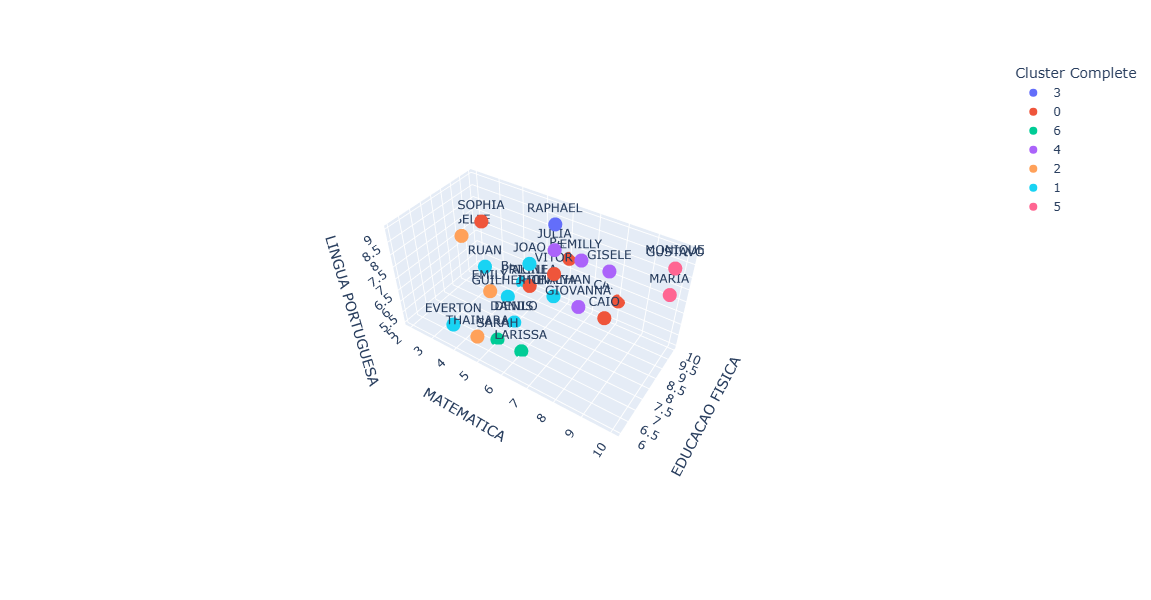

In [272]:

fig = px.scatter_3d(notas, 
                    x='MATEMATICA', 
                    y='EDUCACAO FISICA', 
                    z='LINGUA PORTUGUESA',
                    color= 'Cluster Complete',
                    text=notas.Nome)
fig.update_layout(
    width = 800,
    height = 600
)
iplot(fig)


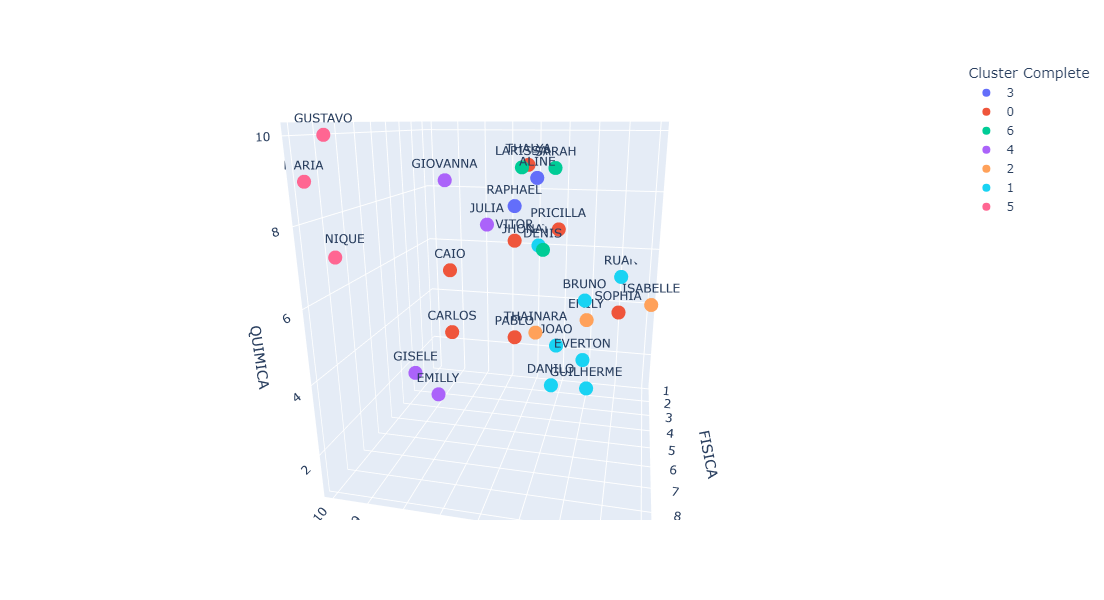

In [273]:

fig = px.scatter_3d(notas, 
                    x='MATEMATICA', 
                    y='FISICA', 
                    z='QUIMICA',
                    color= 'Cluster Complete',
                    text=notas.Nome)
fig.update_layout(
    width = 800,
    height = 600
)
iplot(fig)


In [ ]:

fig = px.scatter_3d(notas, 
                    x='SOCIOLOGIA', 
                    y='HISTORIA', 
                    z='GEOGRAFIA',
                    color= 'Cluster Complete',
                    text=notas.Nome)
fig.update_layout(
    width = 800,
    height = 600
)
iplot(fig)


# Análise - Dados eleitorais

## Preparando os dados

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

prefeito = pd.read_excel('Dados_PrefVer_BeloHorz_MG.xlsx')
prefeito[0:5]

,DS_CARGO,NM_VOTAVEL,NM_PARTIDO,QT_VOTOS
0,Prefeito,NILMÁRIO MIRANDA,Partido dos Trabalhadores,15
1,Prefeito,BRUNO ENGLER,Partido Renovador Trabalhista Brasileiro,43
2,Prefeito,PROFESSOR WENDEL MESQUITA,Solidariedade,2
3,Prefeito,LAFAYETTE ANDRADA,REPUBLICANOS,1
4,Prefeito,Branco,#NULO#,8


In [23]:
vereador = pd.read_excel('Dados_PrefVer_BeloHorz_MG.xlsx', sheet_name=1)
vereador[0:5]

,DS_CARGO,NM_VOTAVEL,NM_PARTIDO,QT_VOTOS
0,Vereador,GABRIEL SAPUCAIA,Partido Novo,3
1,Vereador,LUCAS SILVA,Partido Novo,1
2,Vereador,WELLINGTON RAMOS,Solidariedade,1
3,Vereador,JUNIOR BRASIL DA ITATIAIA,Partido Trabalhista Brasileiro,1
4,Vereador,KEILA JACQUELINE,Rede Sustentabilidade,1


In [25]:
vereador.shape[0]

440610

In [24]:
vereador.drop(columns='DS_CARGO',inplace=True)
vereador['NM_VOTAVEL'].value_counts()

NM_VOTAVEL
Branco                      3491
Nulo                        3490
PSD                         3429
NIKOLAS FERREIRA            3423
PROFESSORA DUDA SALABERT    3418
                            ... 
BIANCA ANGEL                   1
MARIA FRANCISCA                1
DONA CONCEIÇÃO                 1
TIA LEIDE                      1
JULIANA SANTANA                1
Name: count, Length: 1531, dtype: int64

In [29]:
votos_vereador = vereador.groupby(['NM_VOTAVEL','NM_PARTIDO']).sum()
votos_vereador.to_excel('Votos por vereador.xlsx')

In [ ]:
prefeito.shape

In [ ]:
prefeito.info()

In [ ]:
prefeito['DS_CARGO'].value_counts()

In [ ]:
prefeito.drop(columns='DS_CARGO', inplace=True)

In [30]:
votos_prefeito = prefeito.groupby(['NM_VOTAVEL', 'NM_PARTIDO']).sum()
votos_prefeito.to_excel('Votos por prefeito.xlsx')

---

In [35]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

alunos = np.arange(1, 51, 1)
notas = np.random.normal(8, 0.5, 50)

df = pd.DataFrame({
    'Alunos': alunos,
    'Notas': notas
})

df[0:5]

,Alunos,Notas
0,1,8.523096
1,2,8.941328
2,3,7.829360
3,4,6.716842
4,5,7.728060


<Axes: xlabel='Alunos', ylabel='Notas'>

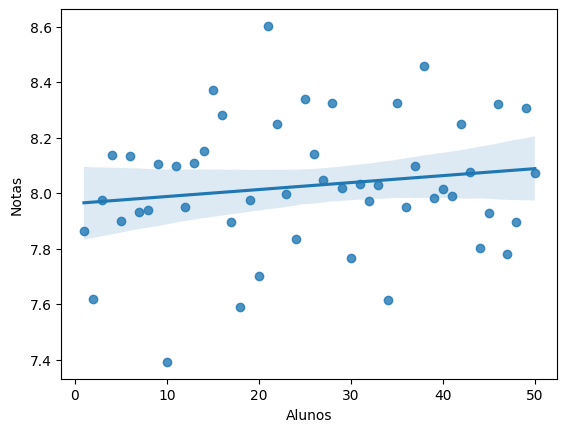

In [34]:
sns.regplot(data = df, x ='Alunos', y ='Notas')

In [36]:
df.corr()

,Alunos,Notas
Alunos,1.00000,0.09642
Notas,0.09642,1.00000


In [ ]:
modelo_auxiliar = sm.OLS.from_formula('yhat ~ distancia', df_tempodist).fit()


In [4]:
 errors = {'Alerta': '.msg-mensagem.msg-tipo-alerta', 
           'Aviso': '.msg-mensagem.msg-tipo-aviso',
            'Erro': '.msg-mensagem.msg-tipo-erro'}

for error_type in errors:  # para cada mensagem de erro, verifica se ela está presente na página
    for selector in error_type:

Alerta
Aviso
Erro


In [6]:
 errors = [('Alerta', '.msg-mensagem.msg-tipo-alerta'), 
           ('Aviso', '.msg-mensagem.msg-tipo-aviso'),
            ('Erro', '.msg-mensagem.msg-tipo-erro')]

for error, css_selector in errors:
    print(f'{error}: {css_selector}')

Alerta: .msg-mensagem.msg-tipo-alerta
Aviso: .msg-mensagem.msg-tipo-aviso
Erro: .msg-mensagem.msg-tipo-erro


In [2]:
compras = ['Banana', 'Maçã', 'Cenoura', 'Abacate']
compras.remove('Banana')

compras


['Maçã', 'Cenoura', 'Abacate']

---

# Introdução ao Python

## Variáveis

Não é preciso colocar ponto e vírgula no python!

In [21]:
# int número inteiro
# float número com decimal

x = 1.2 # float (decimal)
y = 3   # int (inteiro)
z = "2" # str (string)
lista = [10, 2.9, "batata"] # list

print(x,y,z, sep='\n')



1.2
3
2


## Diferentes formas de se usar o print

In [22]:
x = 2
y = 3
soma = x + y
print("x + y =", soma)

x + y = 5


In [37]:
x = 5
y = 2.412131
print("O valor de x é",x) # você está aqui

print("O valor de x + y é %.1f" % (x+y)) # linguagem C

print(f"O valor de x é {round(y, 3)}")


O valor de x é 5
O valor de x + y é 7.4
O valor de x é 2.412


## Identação

In [41]:
skill = input()

if skill == 'Cat 180 pre':
    print('Puts, difícil...')

elif skill == "Pre longe":
    print('Hmm, a especialidade do pai')
    
else:
    print('Izi pizi, lemon squeezy')
    

 Pre longe


Hmm, a especialidade do pai


# tempovideo

In [1]:
def tempovideo(velocidade: int, h, m):
    t = h + m/60
    tf = t/velocidade

    hf = int(tf//1)
    mf = round(tf%1 * 60)
    print(f'Tempo de vídeo: {h}h{m}m\nTempo de vídeo {velocidade}x: {hf}h{mf}m')

tempovideo(1.75, 3,30)
    

Tempo de vídeo: 3h30m
Tempo de vídeo 1.75x: 2h0m


In [9]:
import pyperclip

def jupyter_format(s: str):
    s = s.replace('\\(', '$')
    s = s.replace('\\)', '$')
    s = s.replace('\\[', '\\begin{equation}')
    s = s.replace('\\]', '\\end{equation}')
    s = s.replace('#', '')
    pyperclip.copy(s)



jupyter_format(pyperclip.paste())

In [45]:
from random import choice

qtde_numeros = 25
num_sorteios = 15

feq_par = 0
feq_impar = 0

maispar = 0

def nparimpar(lista):
    npar = 0
    nimpar = 0

    for n in lista:
        if n%2 == 1:
            nimpar += 1
        else:
            npar += 1
            
   # print(lista)
   # print(f'número de pares: {npar}, número de ímpares: {nimpar},')
    return [nimpar/len(lista), npar/len(lista)]

i = 1000 # numero de simulações
for _ in range(i):
    numeros = list(range(1, qtde_numeros + 1))
    num_sorteados = []
    for _ in range(num_sorteios):
        num_sorteado = choice(numeros)
        num_sorteados.append(num_sorteado)
        numeros.remove(num_sorteado)
    feq_par += nparimpar(num_sorteados)[1]
    feq_impar += nparimpar(num_sorteados)[0]

    if nparimpar(num_sorteados)[1] > 0.5:
        maispar += 1

    
print(f'Frequência de números pares: {feq_par*100/i}\nFrequência de números ímpares: {feq_impar*100/i}\nFrequência de mais pares: {maispar*100/i}')
    

Frequência de números pares: 47.8533333333332
Frequência de números ímpares: 52.1466666666668
Frequência de mais pares: 40.5


In [13]:
7%2

1

In [505]:
from random import randint as ri

balance = 10000
rounds = 370
bet = 100 # define a aposta inicial
wins = 0
losses = 0
win_rate = 33
success = 0

for _ in range(1000):
    for _ in range(rounds):
        if ri(1, 100) >= win_rate:
            balance -= bet
          #  print(f"Perdeu a aposta ({bet,}). Dobrando a aposta...\nBalanço atual: {balance}\n")
            losses +=1
            bet = 2*bet  
                
        else:
            balance += bet
         #   print(f"Ganhou a aposta ({bet}).\nBalanço atual: {balance}\n")
            wins += 1
            bet = 100

    if balance > 10000:
        success += 1

#print(f"Balanço total {balance}\nWins: {wins}\nLosses: {losses}")
print(f'Sucessos: {success}')

Sucessos: 998


# Utilizando a API da DeepSeek

Mais informações em https://openrouter.ai/deepseek/deepseek-r1:free/api

## System x User

Na API da DeepSeek (e na maioria das APIs baseadas no formato OpenAI), os papéis `system` e `user` dentro dos `messages` servem para estruturar a conversa. Aqui está a diferença entre eles:

### 1. **`system` (Sistema)**
   - Define **o comportamento e o contexto do modelo**.
   - Funciona como uma "configuração inicial" para guiar o tom e o estilo das respostas.
   - **O modelo não responde diretamente à mensagem `system`**, mas usa essas instruções para estruturar suas respostas futuras.

   **Exemplo:**
   ```json
   {"role": "system", "content": "Você é um professor de matemática que responde de forma detalhada."}
   ```
   Isso faz com que o modelo tente responder como um professor de matemática.

---

### 2. **`user` (Usuário)**
   - Representa as perguntas ou comandos enviados pelo usuário.
   - O modelo responde diretamente a essa entrada.
   - O conteúdo da mensagem `user` pode ser qualquer coisa, como perguntas, tarefas ou solicitações.

   **Exemplo:**
   ```json
   {"role": "user", "content": "Explique o Teorema de Pitágoras."}
   ```

   Combinado com o `system`, a resposta será dada como um professor de matemática.

---

### **Exemplo Completo de Conversa**
```python
import openai

openai.api_key = "sua_chave_aqui"
openai.api_base = "https://api.deepseek.com"

response = openai.ChatCompletion.create(
    model="deepseek/deepseek-r1:free",
    messages=[
        {"role": "system", "content": "Você é um assistente educado que responde de forma clara."},
        {"role": "user", "content": "O que é inteligência artificial?"}
    ]
)

print(response.choices[0].message['content'])
```

---

### **Resumo**
| Role    | Função |
|---------|--------|
| `system` | Define o comportamento do modelo. |
| `user`   | Representa a entrada do usuário. |

Quer que eu te mostre algum outro exemplo mais específico? 😊

#### Teste inicial

In [8]:
from openai import OpenAI

DeepSeek_API_Key = "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"

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=DeepSeek_API_Key,
)

completion = client.chat.completions.create(
  model="deepseek/deepseek-r1:free",
  messages=[
    {
      "role": "user",
      "content": "What is the meaning of life?"
    }
  ]
)
print(completion.choices[0].message.content)

The question "What is the meaning of life?" is profound and has sparked diverse interpretations across cultures, philosophies, and disciplines. Here’s a synthesized exploration of this timeless inquiry:

### 1. **Philosophical Perspectives**  
   - **Existentialism**: Suggests life has no inherent meaning, but individuals *create* purpose through choices, passions, and authenticity (e.g., Sartre, Camus).  
   - **Absurdism** (Camus): Life’s lack of inherent meaning clashes with our search for it—embracing this tension is key (think "The Myth of Sisyphus").  
   - **Utilitarianism**: Focuses on maximizing happiness or reducing suffering (Bentham, Mill).  
   - **Nihilism**: Argues life lacks objective meaning, purpose, or intrinsic value.  

### 2. **Religious/Spiritual Views**  
   - Many faiths tie meaning to a divine plan or connection with a higher power (e.g., serving God in Abrahamic religions, achieving enlightenment in Buddhism, or uniting with Brahman in Hinduism).  
   - Often

In [13]:
from openai import OpenAI
from time import time

t1 = time()
DeepSeek_API_Key = "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"

client = OpenAI(
  base_url="https://openrouter.ai/api/v1",
  api_key=DeepSeek_API_Key,
)

completion = client.chat.completions.create(
  model="deepseek/deepseek-r1:free",
  messages=[
    {"role": "system","content": "Responda de forma objetiva."},
    {"role": "user","content": "Analisando o site https://coinmarketcap.com/, faça uma lista com as 10 melhores criptomoedas para se investir, incluindo o marketcap de cada uma."}
  ]
)
t2 = time()
print(completion.choices[0].message.content)
print(f"Tempo de execução do programa: {t2-t1}")

Aqui está a lista das 10 principais criptomoedas por **market cap** (capitalização de mercado), conforme dados do CoinMarketCap em *26 de junho de 2024*. Essa classificação reflete posição e valor no momento da análise, mas o mercado é altamente volátil:

| #  | Nome             | Símbolo | Market Cap (USD)       |
|----|------------------|---------|------------------------|
| 1  | Bitcoin          | BTC     | $1,229,503,944,065     |
| 2  | Ethereum         | ETH     | $432,146,982,897       |
| 3  | Tether           | USDT    | $112,306,029,350       |
| 4  | BNB              | BNB     | $85,085,116,826        |
| 5  | Solana           | SOL     | $71,877,069,550        |
| 6  | USD Coin         | USDC    | $32,050,572,547        |
| 7  | XRP              | XRP     | $28,881,158,382        |
| 8  | Dogecoin         | DOGE    | $21,924,230,670        |
| 9  | Toncoin          | TON     | $15,980,097,016        |
| 10 | Cardano          | ADA     | $15,743,373,635        |

### Observa